<a href="https://colab.research.google.com/github/0xPriyanshuJha/ML-Expedition/blob/main/doggoBreedFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## End to End Multi-Class Dog Breed Classifier
This notebook builds an end-to-end multi-class image classifier using tensorflow and tensorflow hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

## 2. Data
The data we're using is from kaggle's dog breed identification competition.

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features
Some information about the data:
* We're dealing with images(unstructured data) so its probably best if we use deep learning/transfer learning.
* There are 120 breeds of dogs(means 120 different classes).
* There are around 10,000+ images in the training set(labelled).
* There are around 10,000+ images in test set(unlaballed).

In [ ]:
# !unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

## Getting our workspace ready

In [ ]:
# importing tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub

#checking for gpu availability
print("GPU", "available (Yes!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


# getting our data ready (turning into tensors)
with all ML models, our data has to be in numerical foramt, turning our images into tensors(numercal representation)

In [ ]:
# checkout the labels of our data
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

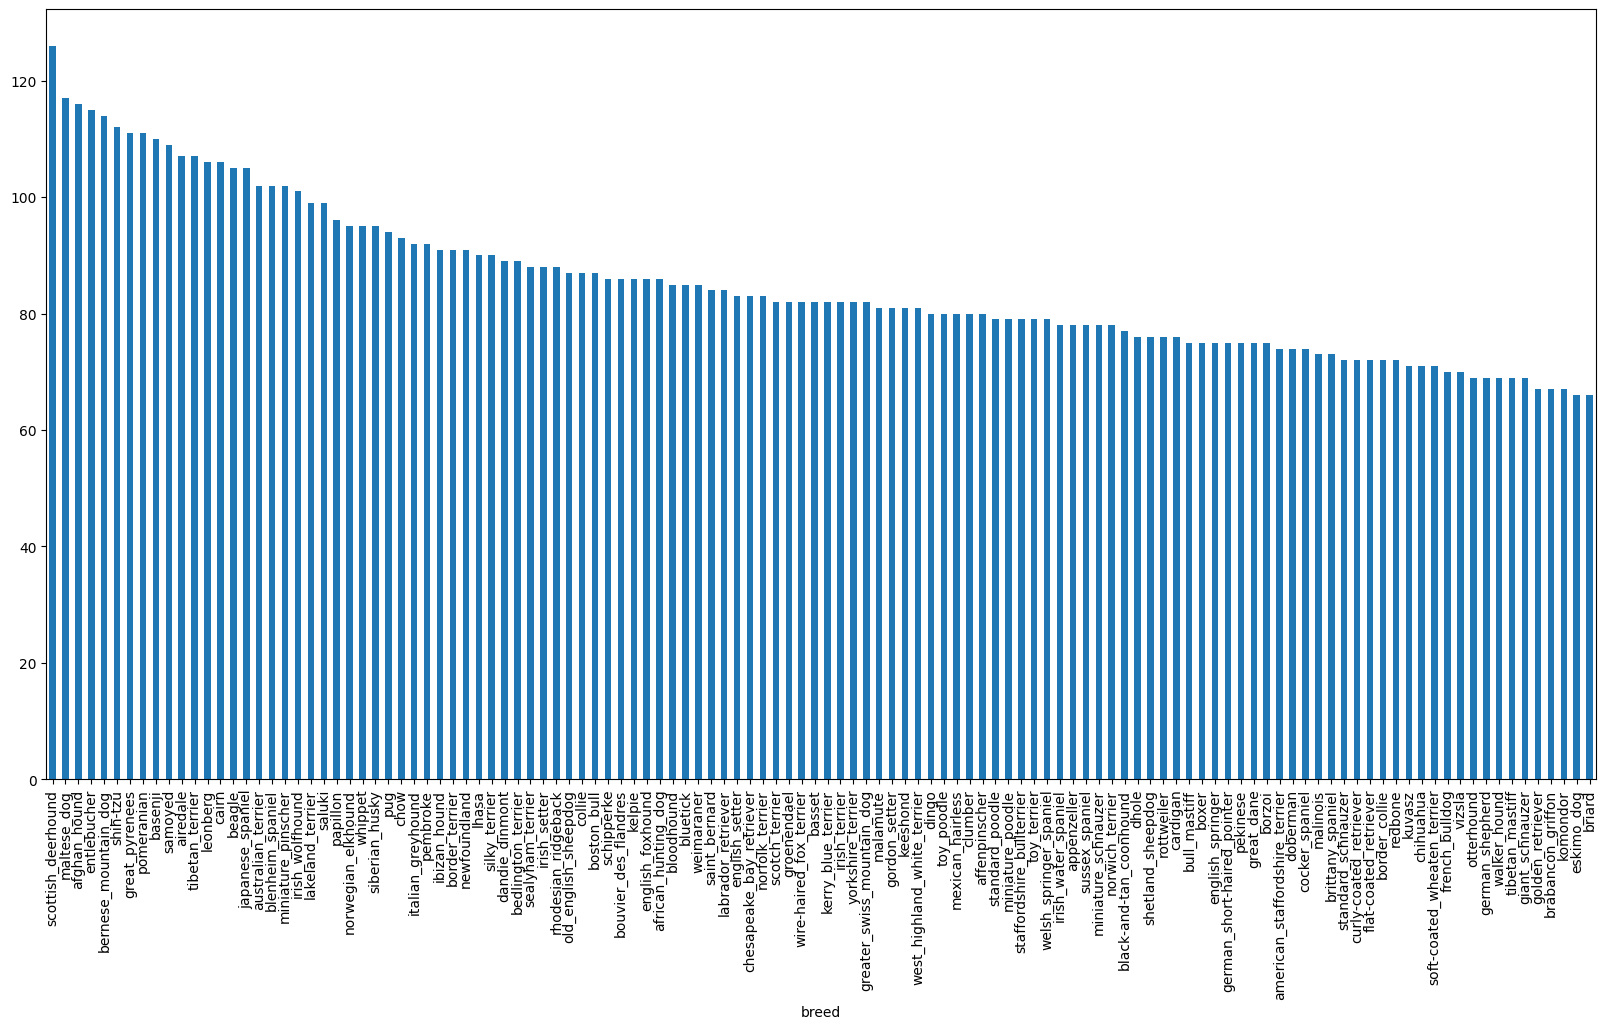

In [ ]:
# counting the type of breeds available
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

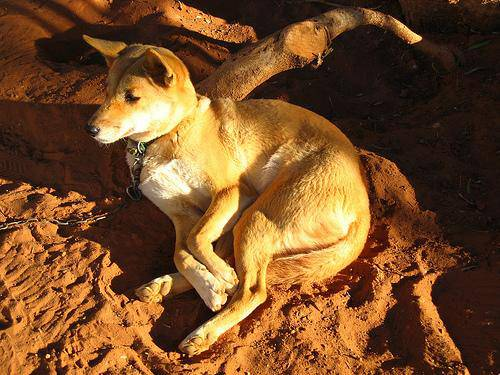

In [ ]:
# viewing an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our images file pathnames.

In [ ]:
# create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
#checking the first 10
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("match successful")
else:
  print("not matched")

match successful


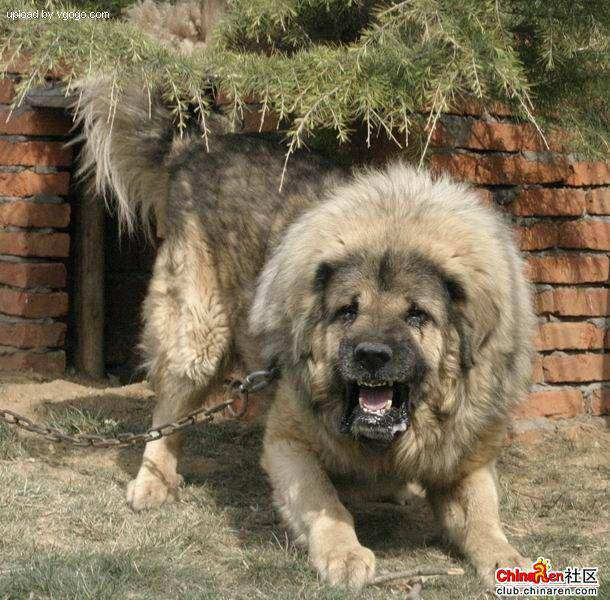

In [ ]:
Image(filenames[9000])

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# checking if numbers of labels matches the number of filenames
if len(labels) == len(filenames):
  print("matches")
else:
  print("not matches")

matches


In [ ]:
# finding the unique label values
unique = np.unique(labels)
len(unique)

120

In [ ]:
# turn a single label into a array of booleans
print(labels[0])
labels[0] == unique

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into a boolean array
boolean_labels = [label == unique for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# example: turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since the dataset from kaggle doesn't come with a validation set, we are going to create our own.

In [ ]:
# Setup X and Y variables
X = filenames
y = boolean_labels

We are going to start off experimenting with ~1000 images and increase as needed

In [ ]:
# Set number of images to use for experimenting
Num_img = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size Num_img
X_train, X_val, y_train, y_val = train_test_split(X[:Num_img], y[:Num_img], test_size = 0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:5]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### Preprocessing our images (turning images into Tensors)
To preprocess our images into tensor's we are going to write a function which does a few things.
1. Take image filepath as input
2. Use tensorflow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`








In [ ]:
# convert the image into NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
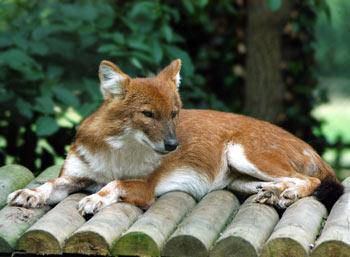

In [ ]:
image

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

### Now we have seen how to convert images into tensors, it's time to make a function of that..
1. Take image filepath as input
2. Use tensorflow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Convert the colour channel values from 0-255 to 0-1 values
6. Return the modified `image`

In [ ]:
# Define Image size

IMG_SIZE = 244

# Create a function for preprocessing images
def process_img(image_path):
  """
  Takes an image file path and turns the image into Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpe g image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say we are trying to process 10,000 images in one go... they all might not fit into memory.

So that's why we do about 32 (batch size) images at a time (we can manually adjust the batch size if need be).

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`.

In [ ]:
# Create a simple function to return a tuple (image, label)

def getimglabel(image_path, label):
  """
  Take an image file path name and the associated label, processes the image and returns a tuple of (image, label).
  """
  image = process_img(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_img(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
 array([[[0.33240733, 0.528404  , 0.32877645],
         [0.26302028, 0.454124  , 0.25184554],
         [0.24322662, 0.43179044, 0.22709224],
         ...,
         [0.29380426, 0.52090865, 0.32451057],
         [0.29776222, 0.52521324, 0.33200315],
         [0.29484236, 0.5222934 , 0.33405805]],
 
        [[0.26853722, 0.46210465, 0.27810386],
         [0.24625303, 0.4426449 , 0.25299522],
         [0.2679708 , 0.4562061 , 0.2626349 ],
         ...,
         [0.28107235, 0.50784814, 0.3127341 ],
         [0.28670043, 0.51383805, 0.3265429 ],
         [0.2895012 , 0.5166388 , 0.3293437 ]],
 
        [[0.21171938, 0.41078815, 0.25436452],
         [0.23509896, 0.43457666, 0.27692637],
         [0.28364372, 0.47278884, 0.3107396 ],
         ...,
         [0.26476204, 0.49106047, 0.3046848 ],
         [0.27449086, 0.4980203 , 0.32259437],
         [0.28086528, 0.5043947 , 0.3289688 ]],
 
        ...,
 
        [[0.0082752 , 0.04095767

Now we've got a way to turn our data into tuples of Tensors in the form: `(image,label)`, Let's make a function to turn all of our data (`x`&`y`) into batches!

In [ ]:
# Define the batch size, 32 is good one
Batch_Size = 32

#Create a function to turn data into batches
def data_batches(X, y=None, batch_size=Batch_Size, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuflle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # IF the data is the test datase, we prolly don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_img).batch(Batch_Size)
    return data_batch
  # if the data is the valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) #filepath and labels
    data_batch = data.map(getimglabel).batch(Batch_Size)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) and tuples(this also turns the image path into a preprocessed image)
    data = data.map(getimglabel)

    # Turn the training data into batches
    data_batch = data.batch(Batch_Size)

    return data_batch

In [ ]:
# Creating training and validation sets
train_data = data_batches(X_train, y_train)
val_data = data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### Visualizing Data Batches
Our data us now in batches, however, these can ve a little hard to understand/comprehend, that's why we are going to visualize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def showimg(images, labels):
  #setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25 (for displaying 25 images)
  for i in range(25):
    #create subplot(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    #display an image
    plt.imshow(images[i])
    #add the image label as the title
    plt.title(unique[labels[i].argmax()])
    #turn the grid lines off
    # plt.axis("off")


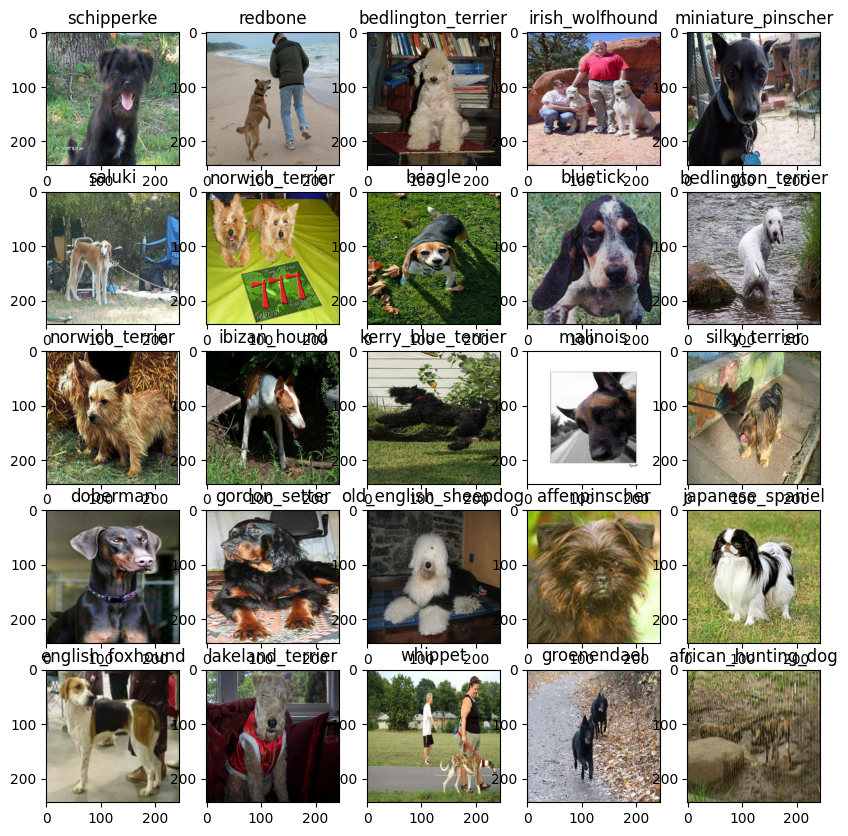

In [ ]:
# now visualise the data
train_images, train_labels = next(train_data.as_numpy_iterator())
showimg(train_images, train_labels)

In [ ]:
# now visualise the validation data
val_images, val_labels = next(val_data.as_numpy_iterator())
#showimg(val_images, val_labels)

### Building Model
Before we build a model, there are a few things we need to define:
* The input shape (our image shape, in the form of tensors) to our models.
* The output shape (our image labels, in the form of tensors) to our models.
* The URL of the model we want to use from tensorflowhub. "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-classification/2"

In [ ]:
# Setup input shape to the model
Input_Shape = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup Output shape of our model
Output_Shape = len(unique)

# Setup model URL from tensorflow hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Define the layers in keras model in sequential fashion(do this first, then this, then that).
* Build the models (tells the model the input shape it'll be getting).
* Return the model

In [ ]:
import tf_keras
import tensorflow_hub as hub # Import tensorflow hub

def create_model(input_shape=(None, 224, 224, 3), output_shape=Output_Shape, model_url=MODEL_URL): # Changed input shape to match the model
    print("Building model with:", model_url)

    # Setup the model layers
    model = tf_keras.Sequential([
        hub.KerasLayer(model_url),
        tf_keras.layers.Dense(units=output_shape, activation="softmax")
    ])

    # Compile the model
    model.compile(
        loss=tf_keras.losses.CategoricalCrossentropy(),
        optimizer=tf_keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    model.build(input_shape) #Let the model know what its building

    return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Creating callback functions
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.
We'll create two callbacks,one for TensorBoard which helps our models progress and another for early stopping which prevents our model for training for too long.

## TensorBoard Callback
To setup a tensorboard, we need to do 3 things:
1. Load the tensorboard notebook extension
2. create a tensorboard callback which is able to save logs to a directory
3. Visualize our models training logs with the `%tensorboard` magic function(after model training)

In [ ]:
# load Tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  # create a log directory for storing tensorboard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf_keras.callbacks.TensorBoard(logdir)

### Early stopping callback
early stopping helps stop our model from overfitting by stopping training if a certain metric is met.

In [ ]:
# create early stopping callback
early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                    patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
print("GPU", "available(YES!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


Let's create a function which trains a model.
* Create a model using `create_model()`
* Setup a Tensorboard callback using `create_tensorboard callback()`
* Fit the model to the data using `model.fit()`
* Return the model

In [ ]:
# Build a function to train a model and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()


  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
model = train_model()

Building model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1147, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file7ehgz00n.py", line 74, in tf__call
        ag__.if_stmt(ag__.not_(ag__.ld(self)._has_training_argument), if_body_3, else_body_3, get_state_3, set_state_3, ('result', 'training'), 1)
    File "/tmp/__autograph_generated_file7ehgz00n.py", line 72, in else_body_3
        result = ag__.converted_call(ag__.ld(smart_cond).smart_cond, (ag__.ld(training), ag__.autograph_artifact(lambda : ag__.converted_call(ag__.ld(f), (), dict(training=True), fscope)), ag__.autograph_artifact(lambda : ag__.converted_call(ag__.ld(f), (), dict(training=False), fscope))), None, fscope)
    File "/tmp/__autograph_generated_file7ehgz00n.py", line 72, in <lambda>
        result = ag__.converted_call(ag__.ld(smart_cond).smart_cond, (ag__.ld(training), ag__.autograph_artifact(lambda : ag__.converted_call(ag__.ld(f), (), dict(training=True), fscope)), ag__.autograph_artifact(lambda : ag__.converted_call(ag__.ld(f), (), dict(training=False), fscope))), None, fscope)

    ValueError: Exception encountered when calling layer 'keras_layer_2' (type KerasLayer).
    
    in user code:
    
        File "/usr/local/lib/python3.10/dist-packages/tensorflow_hub/keras_layer.py", line 250, in call  *
            result = smart_cond.smart_cond(training,
    
        ValueError: Can not squeeze dim[1], expected a dimension of 1, got 2 for '{{node predict/MobilenetV2/Logits/Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[1, 2]](predict/MobilenetV2/Logits/Conv2d_1c_1x1/Identity)' with input shapes: [?,2,2,1001].
    
    
    Call arguments received by layer 'keras_layer_2' (type KerasLayer):
      • inputs=tf.Tensor(shape=(None, 244, 244, 3), dtype=float32)
      • training=True
